In [2]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('retractions_cleaned.csv')
data.head(), data.describe(include='all'), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105539 entries, 0 to 105538
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              105363 non-null  float64
 1   Title                  105363 non-null  object 
 2   Subject                105363 non-null  object 
 3   Institution            105361 non-null  object 
 4   Journal                105363 non-null  object 
 5   Publisher              105362 non-null  object 
 6   Country                105363 non-null  object 
 7   ArticleType            105363 non-null  object 
 8   RetractionDate         105363 non-null  object 
 9   RetractionDOI          104359 non-null  object 
 10  RetractionPubMedID     95019 non-null   float64
 11  OriginalPaperDate      105363 non-null  object 
 12  OriginalPaperDOI       100285 non-null  object 
 13  OriginalPaperPubMedID  95069 non-null   float64
 14  RetractionNature       105363 non-nu

(   Record ID                                              Title  \
 0    52959.0  The Development of Illness Anxiety Disorder in...   
 1    52958.0  Molecular Diagnosis of Primary Hyperoxaluria T...   
 2    52957.0  Intervention en 1 √©tape pour la chol√©docholi...   
 3    52956.0  Traditional and Recent Root Canal Irrigation M...   
 4    52955.0  Upregulation of microRNA-576-5p protects from ...   
 
                                              Subject  \
 0  (HSC) Medicine - Endocrinology;(HSC) Medicine ...   
 1  (BLS) Biology - Molecular;(HSC) Medicine - Uro...   
 2  (HSC) Medicine - Gastroenterology;(HSC) Medici...   
 3  (HSC) Medicine - Dentistry;(HSC) Medicine - Su...   
 4  (BLS) Genetics;(HSC) Medicine - Cardiovascular...   
 
                                          Institution  \
 0  Psychiatry, King George Hospital, Visakhapatna...   
 1  Biomedical and Translational Research Laborato...   
 2  Centre de sant√© Meno Ya Win de Sioux Lookout;...   
 3  Department of 

In [3]:
# Convert RetractionDate to datetime format and extract the year
data['RetractionDate'] = pd.to_datetime(data['RetractionDate'], errors='coerce')
data['RetractionYear'] = data['RetractionDate'].dt.year

# Drop rows with NaN values in RetractionYear
data = data.dropna(subset=['RetractionYear'])


## Visualization: Retractions per Year

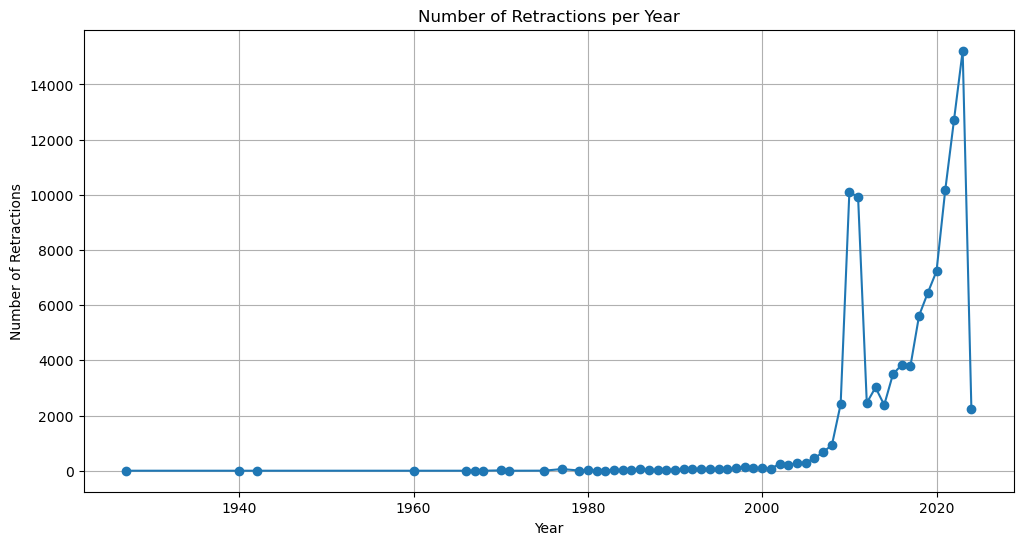

In [4]:
# Count retractions per year
retractions_per_year = data['RetractionYear'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(retractions_per_year.index, retractions_per_year.values, marker='o', linestyle='-')
plt.title('Number of Retractions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Retractions')
plt.grid(True)
plt.show()


## Visualization: Retractions per Year 2000-2023

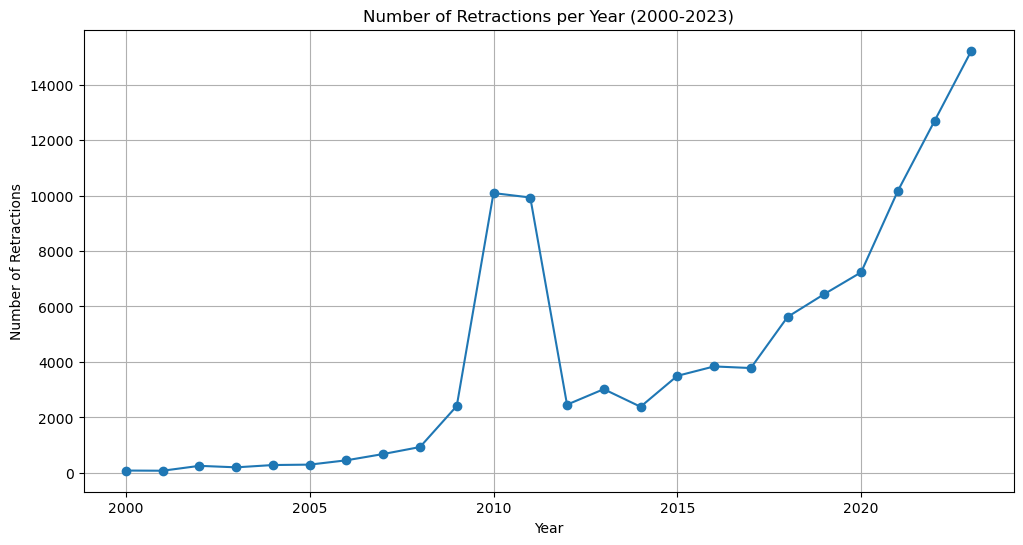

In [19]:
data_2000_to_2023 = data[(data['RetractionYear'] >= 2000) & (data['RetractionYear'] <= 2023)]

# Count retractions per year from 2000 to 2023
retractions_per_year_2000_to_2023 = data_2000_to_2023['RetractionYear'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(retractions_per_year_2000_to_2023.index, retractions_per_year_2000_to_2023.values, marker='o', linestyle='-')
plt.title('Number of Retractions per Year (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Retractions')
plt.grid(True)
plt.show()

## Visualization: Distribution of Article Types

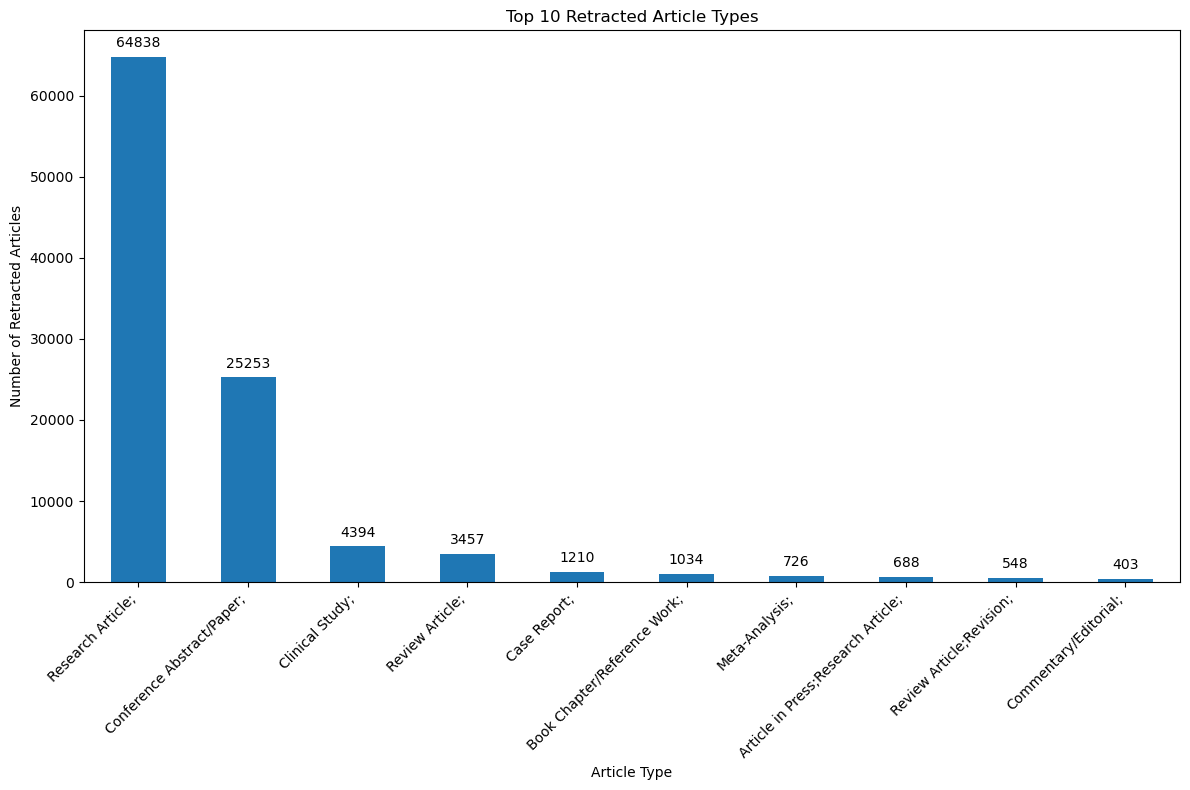

In [17]:
top_10_article_types = article_type_counts.head(10)

# Plotting the bar plot for top 10 article types
plt.figure(figsize=(12, 8))
ax = top_10_article_types.plot(kind='bar')
plt.title('Top 10 Retracted Article Types')
plt.xlabel('Article Type')
plt.ylabel('Number of Retracted Articles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

## Visualization: Top 10 Article Type Pie Chart

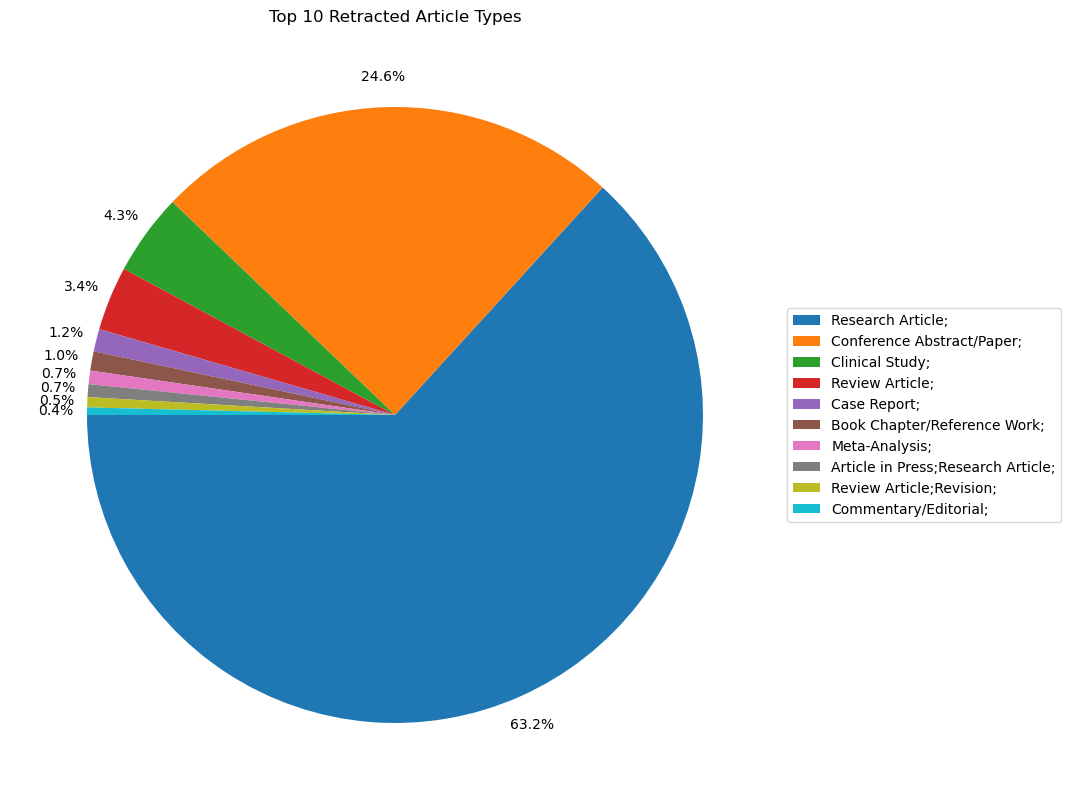

In [14]:
# Plotting the pie chart for top 10 article types with external legend
plt.figure(figsize=(10, 10))
plt.pie(top_10_article_types, labels=None, autopct='%1.1f%%', startangle=180, pctdistance=1.10, labeldistance=1.8)
plt.title('Top 10 Retracted Article Types')

# Adding the legend
plt.legend(top_10_article_types.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
